In [1]:
%matplotlib inline
from matplotlib import style   # import style from matplotlib
style.use('fivethirtyeight')   # spec. style we want-- 538
import matplotlib.pyplot as plt   # dependency that provides us w MATLAB-like plotting framework

In [2]:
import numpy as np    # numpy and pandas dependencies
import pandas as pd

In [3]:
import datetime as dt   # datetime dependencies

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy                                   ## importing some dependenies from SQL-Alchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func      # These dependencies will help us set up a simple database that we'll use later

In [5]:
# SQLAlchemy Create Engine

engine = create_engine("sqlite:///hawaii.sqlite")

# create_engine() func. sets up the ability to query a SQLite database
# func. doesn't actually connect to our database; it just prepares the database file to be connected to later on

In [6]:
# reflect an existing database into a new model

Base = automap_base()  # transfers the contents of the db into a different structure of data
# reflect the tables
Base.prepare(engine, reflect=True)  # 'reflect=True' creates classes that helps keep our code seperate

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()   # keys() references all the names of the classes

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)      # (essentially) starts a convo. btwn database and python code

In [10]:
# to query date and precipetation col. 
results = session.query(Measurement.date, Measurement.prcp).all  # retrieve data/prcp columns from meas. table


In [11]:
#for result in results:
#    print(result)

# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

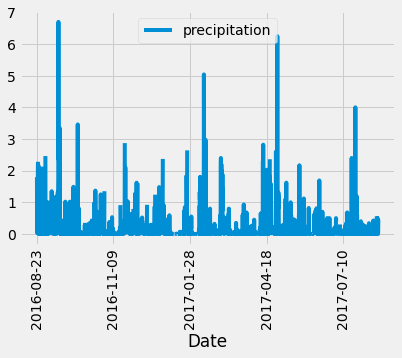

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []

#results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())

# filter out all of the data that is older than a year from the last record date
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#.  above extracts all results from the spec. query and puts them in a list
#for result in results:
   #print(result)
    
    
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns = ['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace = True)   # inplace=True means we do not want to create a new df
                                           # set_index makes the 'date' column the first column in the df
#print(df)
#   print dataframe w/o index to better view the data
#print(df.to_string(index=False))

df = df.sort_index()  # recall index already set to date
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xlabel("Date")
plt.xticks(rotation=90)


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()  

# func.count() (Essentially) counts the given dataset we are intersted in,,
#.  want to count no. of stations in this case

[(9,)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
            .order_by(func.count(Measurement.station).desc()).all()
# left column is the station ID, and on the right are the counts for each station
# counts indicate which stations are most active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
            .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

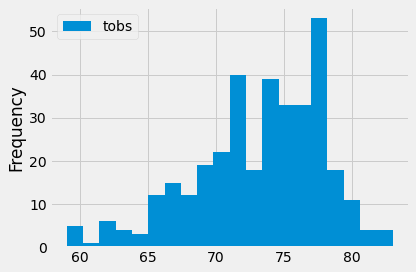

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns=['tobs'])
#print(df)

df.plot.hist(bins=20)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date,end_date):
    

# Challenge